#匯入tensorflow_version 2.x

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

# 資料預處理

In [3]:
import tensorflow.keras.utils as np_utils
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print("train data:",'images:',x_train_image.shape,"labels:",y_train_label.shape) 
print("test  data:",'images:',x_test_image.shape ," labels:",y_test_label.shape) 

train data: images: (60000, 28, 28) labels: (60000,)
test  data: images: (10000, 28, 28)  labels: (10000,)


In [6]:
x_train=x_train_image.reshape(-1,784).astype('float32')
x_test=x_test_image.reshape(-1,784).astype('float32')

In [7]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [8]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [9]:
class_names =["0","1","2","3","4","5","6","7","8","9"]

# 建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout

In [11]:
model = Sequential()

In [12]:
model.add(Dense(input_dim=784,
     kernel_initializer='normal',units=1000, 
     activation='relu'))

In [13]:
model.add(Dropout(0.5))

In [14]:
model.add(Dense(
    units=1000,
    kernel_initializer='normal', 
    activation='relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(
    kernel_initializer='normal',
    units=10,activation='softmax'))

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


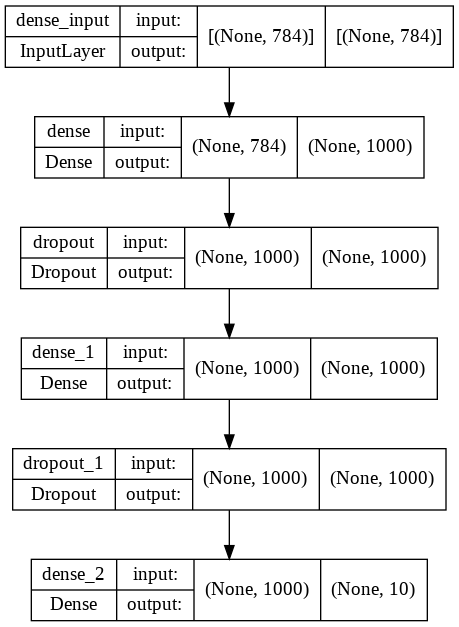

In [18]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [19]:
model.compile(
    metrics=['acc'],optimizer='adam',
    loss='categorical_crossentropy')

In [20]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,validation_split=0.2,
    batch_size=200,epochs=10,verbose=2)

Epoch 1/10
240/240 - 25s - loss: 0.3663 - acc: 0.8864 - val_loss: 0.1310 - val_acc: 0.9613 - 25s/epoch - 106ms/step
Epoch 2/10
240/240 - 16s - loss: 0.1590 - acc: 0.9521 - val_loss: 0.0986 - val_acc: 0.9683 - 16s/epoch - 67ms/step
Epoch 3/10
240/240 - 13s - loss: 0.1215 - acc: 0.9619 - val_loss: 0.0872 - val_acc: 0.9738 - 13s/epoch - 53ms/step
Epoch 4/10
240/240 - 13s - loss: 0.0982 - acc: 0.9688 - val_loss: 0.0784 - val_acc: 0.9764 - 13s/epoch - 53ms/step
Epoch 5/10
240/240 - 12s - loss: 0.0826 - acc: 0.9732 - val_loss: 0.0853 - val_acc: 0.9737 - 12s/epoch - 52ms/step
Epoch 6/10
240/240 - 13s - loss: 0.0738 - acc: 0.9764 - val_loss: 0.0712 - val_acc: 0.9781 - 13s/epoch - 52ms/step
Epoch 7/10
240/240 - 12s - loss: 0.0651 - acc: 0.9791 - val_loss: 0.0723 - val_acc: 0.9793 - 12s/epoch - 52ms/step
Epoch 8/10
240/240 - 13s - loss: 0.0599 - acc: 0.9810 - val_loss: 0.0752 - val_acc: 0.9801 - 13s/epoch - 52ms/step
Epoch 9/10
240/240 - 13s - loss: 0.0558 - acc: 0.9827 - val_loss: 0.0715 - val_

# 以圖形顯示訓練過程

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

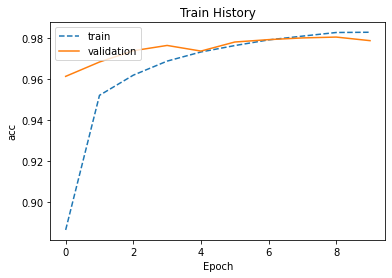

In [22]:
show_train_history(train_history,'acc','val_acc')

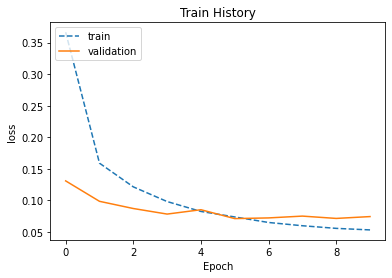

In [23]:
show_train_history(train_history,'loss','val_loss') 

# 評估模型準確率

In [24]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2) 

313/313 - 2s - loss: 0.0694 - acc: 0.9799 - 2s/epoch - 7ms/step


# 進行預測

不能使用model.predict_classes

In [25]:
#prediction=  model.predict_classes(x_test_normalize)

In [26]:
#prediction

建議使用model.predict +tf.argmax 取代

In [27]:
probability = model.predict(x_test_normalize)

In [28]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [29]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

model.predict(x)詳細介紹

In [30]:
probability = model.predict(x_test_normalize)

In [31]:
probability.shape

(10000, 10)

In [32]:
probability [:2]

array([[1.9238739e-11, 1.7132509e-08, 3.8780449e-08, 1.0264458e-07,
        1.4419664e-13, 1.6623560e-11, 7.3156847e-15, 9.9999988e-01,
        3.1676328e-11, 2.9532728e-08],
       [9.2667804e-11, 4.4888543e-04, 9.9955112e-01, 1.9116255e-08,
        5.0519369e-14, 8.1988964e-11, 1.0131659e-11, 2.4393174e-09,
        3.6351183e-10, 1.3672521e-14]], dtype=float32)

tf.argmax用法

In [33]:
data = tf.constant([[3, 2, 1],
           [1, 2, 3],
           [2, 5, 4],
           [1, 9, 3]])

In [34]:
print('     ',tf.argmax(data,0).numpy())

      [0 3 2]


In [35]:
print('    ',tf.argmax(data,-1).numpy())

     [0 2 1 1]


預測類別

In [36]:
probability[0]

array([1.9238739e-11, 1.7132509e-08, 3.8780449e-08, 1.0264458e-07,
       1.4419664e-13, 1.6623560e-11, 7.3156847e-15, 9.9999988e-01,
       3.1676328e-11, 2.9532728e-08], dtype=float32)

In [37]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [38]:
prediction[0]

7

#顯示機率

In [39]:
def show_predicted_probability(images,labels,
     prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',labels[idx])
  if len(labels)>0:print('predict:',prediction[idx])
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[idx][i])) 

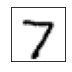

label: 7
predict: 7
0  Probability:0.000000000
1  Probability:0.000000017
2  Probability:0.000000039
3  Probability:0.000000103
4  Probability:0.000000000
5  Probability:0.000000000
6  Probability:0.000000000
7  Probability:0.999999881
8  Probability:0.000000000
9  Probability:0.000000030


In [40]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0)

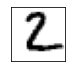

label: 2
predict: 2
0  Probability:0.000000000
1  Probability:0.000448885
2  Probability:0.999551117
3  Probability:0.000000019
4  Probability:0.000000000
5  Probability:0.000000000
6  Probability:0.000000000
7  Probability:0.000000002
8  Probability:0.000000000
9  Probability:0.000000000


In [41]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1)

In [42]:
prediction=tf.argmax(probability, axis=1).numpy()

In [43]:
prediction[0]

7

In [44]:
prediction=tf.argmax(model.predict(x_test_normalize), axis=-1).numpy()

In [45]:
prediction 

array([7, 2, 1, ..., 4, 5, 6])

#顯示預測結果

不能使用model.predict_classes

In [47]:
#prediction= model.predict_classes(x_test_normalize)

In [48]:
#prediction

建議使用model.predict +tf.argmax 取代

In [49]:
probability = model.predict(x_test_normalize)

In [50]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [51]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [52]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

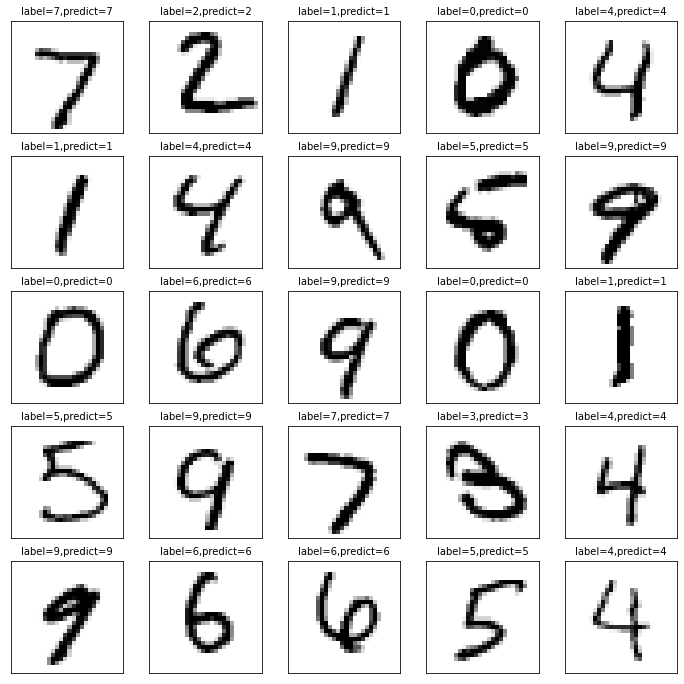

In [53]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=0,num=25)

# confusion matrix

In [54]:
import pandas as pd

In [55]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [56]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,1,1,1,1,0
1,0,1130,1,0,0,1,1,0,2,0
2,3,3,1012,3,2,0,0,6,2,1
3,2,0,3,991,0,4,0,4,4,2
4,2,1,4,0,951,0,3,4,1,16
5,2,0,0,7,0,875,4,0,0,4
6,10,3,1,1,3,4,933,1,2,0
7,2,8,9,1,0,0,0,1002,0,6
8,3,0,1,6,1,4,2,4,947,6


# 查看預測錯誤資料

In [57]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [58]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
3902,5,3
4360,5,3
5937,5,3
6598,5,3
7511,5,3


# 查看預測錯誤資料

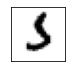

label: 5
predict: 3
0  Probability:0.000000003
1  Probability:0.000456489
2  Probability:0.000000071
3  Probability:0.963133752
4  Probability:0.000000001
5  Probability:0.036384773
6  Probability:0.000000049
7  Probability:0.000000008
8  Probability:0.000017762
9  Probability:0.000007169


In [59]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,340)

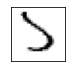

label: 5
predict: 3
0  Probability:0.000006889
1  Probability:0.000921340
2  Probability:0.000006247
3  Probability:0.725385368
4  Probability:0.000000193
5  Probability:0.273210913
6  Probability:0.000008170
7  Probability:0.000031634
8  Probability:0.000083531
9  Probability:0.000345720


In [60]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1393)